In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mysql.connector
import sqlite3
conn = sqlite3.connect('ecommerce.db')
cur = conn.cursor()

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "MyNewPassword123!",
                             database = "ecommerce")

cur = db.cursor()

# Ques 1 -  List all unique cities where customers are located.

In [2]:
query = """ SELECT COUNT(customer_city) FROM customers;
 """

cur.execute(query)

data = cur.fetchall()

data

[(397764,)]

# Ques - 2 - Count the number of orders placed in 2017.

In [3]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 180404)

#  Ques - 3 - Find total sales per category.

In [4]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["Category", "Sales"]) 
df.head(20)

,Category,Sales
0,PERFUMERY,3.243127e+07
1,FURNITURE DECORATION,9.153129e+07
2,TELEPHONY,3.116045e+07
3,BED TABLE BATH,1.096034e+08
4,AUTOMOTIVE,5.454684e+07
5,COMPUTER ACCESSORIES,1.014611e+08
6,HOUSEWARES,7.006452e+07
7,BABIES,3.455012e+07
8,TOYS,3.961841e+07
9,FURNITURE OFFICE,4.139690e+07


# Ques - 4 - Calculate the percentage of orders that were paid in installments.

In [4]:
query = """ select sum(case when payment_installments >=1 then 1
else 0 end)/count(*)*100 from payments
"""

cur.execute(query)

data = cur.fetchall()

"The percentage of orders that were paid in installments is", data[0][0]

('The percentage of orders that were paid in installments is',
 Decimal('99.9981'))

# Ques - 5 - Calculate the percentage of orders that were paid in installments.

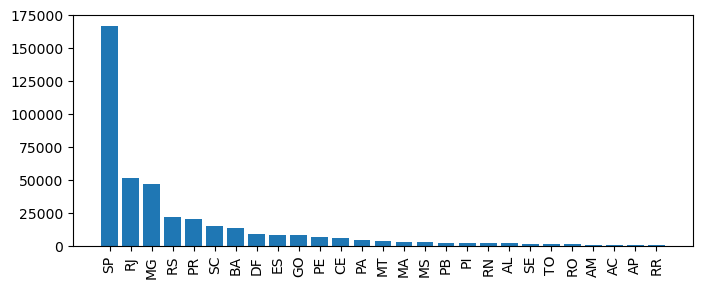

In [5]:
query = """ select customer_state , count(customer_id)
from customers group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count"])
df = df.sort_values(by = "customer_count", ascending=False)

plt.figure(figsize = (8,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)

plt.show()


# Ques - 6 -  Calculate the number of orders per month in 2018.

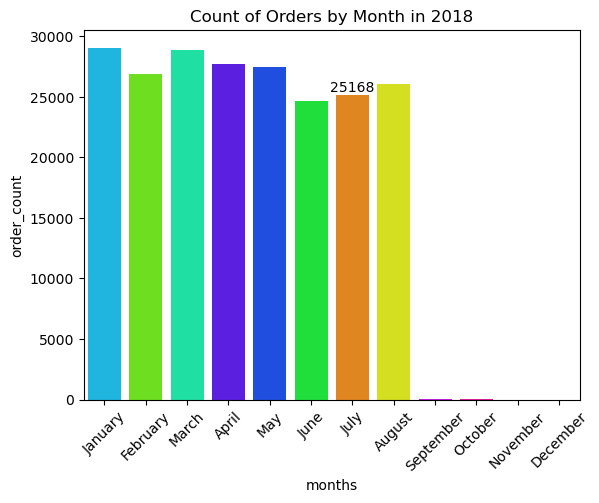

In [7]:
query = """ select monthname(order_purchase_timestamp)months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months", "order_count"])
order_months = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]

# Use a color palette with distinct colors for each month
ax = sns.barplot(x="months", y="order_count", hue="months", data=df, 
                 order=order_months, palette="hsv", dodge=False, legend=False)

plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Month in 2018")

# Remove legend if still present
ax.legend_.remove() if ax.get_legend() else None

plt.show()

# Ques - 7 -  Find the average number of products per order, grouped by customer city.

In [6]:
query = """WITH count_per_orders AS (
  SELECT 
    orders.order_id, 
    orders.customer_id, 
    COUNT(order_items.order_id) AS oc
  FROM orders 
  JOIN order_items ON orders.order_id = order_items.order_id
  GROUP BY orders.order_id, orders.customer_id
)
SELECT 
  customers.customer_city, 
  ROUND(AVG(count_per_orders.oc), 2) AS average_orders
FROM customers
JOIN count_per_orders ON customers.customer_id = count_per_orders.customer_id
GROUP BY customers.customer_city order by average_orders desc

"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer city", "average products / order "])
df.head(20)

,customer city,average products / order
0,padre carvalho,112.00
1,celso ramos,104.00
2,datas,96.00
3,candido godoi,96.00
4,matias olimpio,80.00
5,cidelandia,64.00
6,curralinho,64.00
7,picarra,64.00
8,morro de sao paulo,64.00
9,teixeira soares,64.00


# Ques - 8 -  Calculate the percentage of total revenue contributed by each product category.

In [3]:
query = """select 
  upper(products.product_category) category, 
  round((sum(payments.payment_value) / (select sum(payment_value) from payments)) * 100, 2) sales_percentage
from products 
join order_items on products.product_id = order_items.product_id
join payments on payments.order_id = order_items.order_id
group by category
order by sales_percentage desc;
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "percentage distribution "])
df.head(20)



,Category,percentage distribution
0,BED TABLE BATH,171.16
1,HEALTH BEAUTY,165.65
2,COMPUTER ACCESSORIES,158.45
3,FURNITURE DECORATION,142.94
4,WATCHES PRESENT,142.84
5,SPORT LEISURE,139.14
6,HOUSEWARES,109.42
7,AUTOMOTIVE,85.18
8,GARDEN TOOLS,83.78
9,COOL STUFF,77.93


# Ques - 9 -  Identify the correlation between product price and the number of times the product has been purchased.


In [4]:
query = """select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;

"""
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "order_count", "price"])

# Calculate the correlation coefficient
correlation_matrix = np.corrcoef(df["order_count"], df["price"])
correlation = correlation_matrix[0, 1]

print(f"The correlation between product price and the number of times the product has been purchased is {correlation:.4f}")


The correlation between product price and the number of times the product has been purchased is -0.1063


# Ques - 10 - Calculate the total revenue generated by each seller, and rank them by revenue.

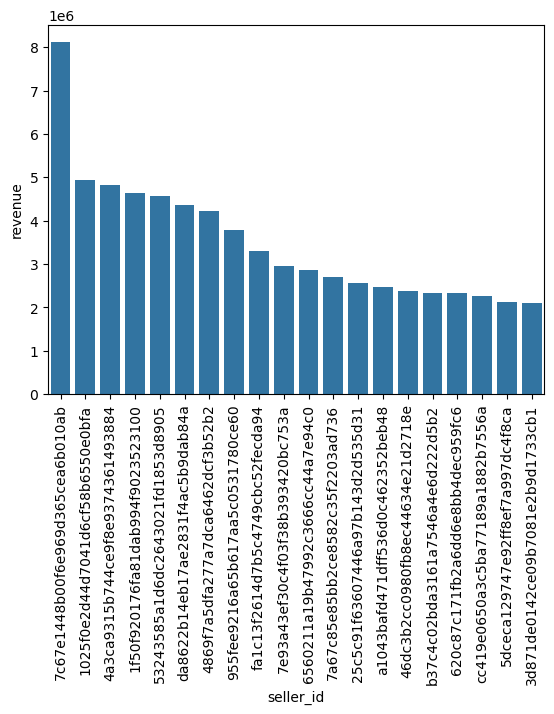

In [9]:
query = """ SELECT *, DENSE_RANK() OVER (ORDER BY revenue DESC) AS rn
FROM (
  SELECT order_items.seller_id, SUM(payments.payment_value) AS revenue
  FROM order_items
  JOIN payments ON order_items.order_id = payments.order_id
  GROUP BY order_items.seller_id
) AS a;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id" , "revenue", "rank"])
df = df.head(20)
sns.barplot(x = "seller_id" , y = "revenue" , data =df)
plt.xticks(rotation =90)
plt.show()



# Ques - 11 - Calculate the moving average of order value for each customer over their order history

In [10]:
query = """ select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
1662171,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1662172,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1662173,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1662174,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# Ques - 12 -  Calculate the cummulative sales per month for each year.

In [11]:
query = """SELECT 
  years,
  months,
  payment,
  FORMAT(SUM(payment) OVER (ORDER BY years, months), 3) AS cumulative_sales
FROM (
  SELECT 
    YEAR(orders.order_purchase_timestamp) AS years,
    MONTH(orders.order_purchase_timestamp) AS months,
    ROUND(SUM(payments.payment_value), 3) AS payment
  FROM orders
  JOIN payments ON orders.order_id = payments.order_id
  GROUP BY years, months
  ORDER BY years, months
) AS sub;"""


cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data)
df



,0,1,2,3
0,2016,9,4.035840e+03,"4,035.840"
1,2016,10,9.454477e+05,"949,483.520"
2,2016,12,3.139200e+02,"949,797.440"
3,2017,1,2.215809e+06,"3,165,606.081"
4,2017,2,4.670528e+06,"7,836,134.233"
5,2017,3,7.197818e+06,"15,033,951.825"
6,2017,4,6.684608e+06,"21,718,560.297"
7,2017,5,9.486701e+06,"31,205,261.419"
8,2017,6,8.180422e+06,"39,385,683.504"
9,2017,7,9.478127e+06,"48,863,810.216"


# Ques - 13 - Calculate the year_over_year growth rate of total sales

In [7]:
query = """with a as(SELECT 
  YEAR(orders.order_purchase_timestamp) AS years,
  FORMAT(SUM(payments.payment_value), 2) AS payment
FROM orders
JOIN payments ON orders.order_id = payments.order_id
GROUP BY years
ORDER BY years)

select years, ((payment - lag(payment , 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = [ "year", "yoy%"])
df

,year,yoy%
0,2016,NaN
1,2017,-87.881981
2,2018,20.869565


# Ques - 14 - Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [10]:
query = """WITH 
a AS (
  SELECT customers.customer_id,
         MIN(orders.order_purchase_timestamp) AS first_order
  FROM customers 
  JOIN orders ON customers.customer_id = orders.customer_id
  GROUP BY customers.customer_id
), 
b AS (
  SELECT a.customer_id, 
         COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order 
  FROM a 
  JOIN orders ON orders.customer_id = a.customer_id
              AND orders.order_purchase_timestamp > a.first_order
              AND orders.order_purchase_timestamp < DATE_ADD(a.first_order, INTERVAL 6 MONTH)
  GROUP BY a.customer_id
)
SELECT 100 * (COUNT(DISTINCT b.customer_id) / COUNT(DISTINCT a.customer_id)) AS percentage
FROM a 
LEFT JOIN b ON a.customer_id = b.customer_id;"""


cur.execute(query)
data = cur.fetchall()

data 


[(Decimal('0.0000'),)]

# Ques - 15 - Identify the top three customers who spent the most money in each year.

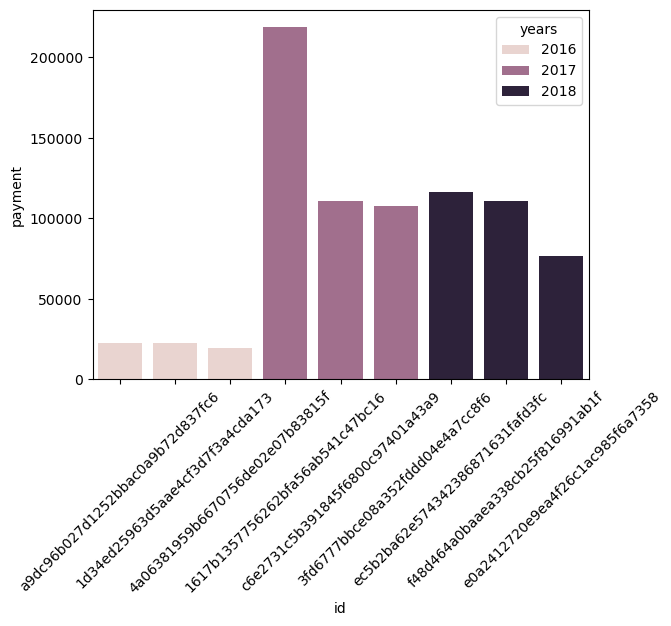

In [12]:
query = """ SELECT years, customer_id, payment, d_rank
FROM (
  SELECT 
    YEAR(orders.order_purchase_timestamp) AS years,
    orders.customer_id,
    SUM(payments.payment_value) AS payment,
    DENSE_RANK() OVER (PARTITION BY YEAR(orders.order_purchase_timestamp)
                      ORDER BY SUM(payments.payment_value) DESC) AS d_rank
  FROM orders 
  JOIN payments ON payments.order_id = orders.order_id
  GROUP BY years, orders.customer_id
) AS a
WHERE d_rank <= 3;

 """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["years", "id", "payment", "rank"])
sns.barplot(x="id", y="payment", data=df, hue="years")
plt.xticks(rotation=45)
plt.show()
